In [1]:
import numpy as np
from numpy.random import uniform
from numpy.random import normal
import matplotlib.pyplot as plt

In [2]:
N=10**6

In [3]:
def Histograma(mu,dR,sigma0,R):
    plt.hist(normal(0,sigma0,size=N),density=True,bins=200,color="blue")
    plt.hist(uniform(-R/2,R/2,size=N),density=True,bins=200,color="orange")
    h,x,_=plt.hist(dR,density=True,bins=200,color="red")#,cumulative=True)
    plt.xlim(-R,R)
    if sigma0==R/np.sqrt(12):
        plt.title(r"Distribución de probabilidad para $\sigma_0=\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    elif sigma0<R/np.sqrt(12):
        plt.title(r"Distribución de probabilidad para $\sigma_0<\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    else:
        plt.title(r"Distribución de probabilidad para $\sigma_0>\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    plt.legend([r"$N(0;\sigma_0)$",r"$U\left(-\frac{R}{2};\frac{R}{2}\right)$",r"$\delta R$"])
    plt.show()
    return h,x

In [4]:
def Acumulada(h,x,sigma0,R):
    FdR=np.cumsum(h)*(x[1]-x[0])
    # normal
    norm=normal(0,sigma0,N)
    v_n, b_n = np.histogram(norm, bins=200,density=True)
    #uniform
    uni=uniform(-R/2,R/2,N)
    v_u, b_u = np.histogram(uni, bins=200,density=True)
    #evaluate the cumulative
    cum_n = np.cumsum(v_n)*(b_n[1]-b_n[0])
    cum_u = np.cumsum(v_u)*(b_u[1]-b_u[0])
    
    # plot the cumulative function
    plt.plot(x[:-1],FdR,color="red")
    plt.plot(b_n[:-1], cum_n, c='blue')
    plt.plot(b_u[:-1], cum_u, c='orange')
    plt.xlabel(r"$\delta$ R")
    plt.ylabel(r"F($\delta$ R)")
    if sigma0==R/np.sqrt(12):
        plt.title(r"Distribución de probabilidad acumulada para $\sigma_0=\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    elif sigma0<R/np.sqrt(12):
        plt.title(r"Distribución de probabilidad acumulada para $\sigma_0<\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    else:
        plt.title(r"Distribución de probabilidad acumulada para $\sigma_0>\frac{R}{\sqrt{12}}$ con $\mu="+str(mu)+"$")
    # plt.title(r"Distribución de probabilidad acumulada cuando $\sigma_0<\frac{R}{\sqrt{12}}$ con $\mu=0$")
    plt.legend([r"$\delta R$",r"N(0;$\sigma_0$)",r"U$\left(\frac{-R}{2};\frac{R}{2}\right)$"])
    plt.xlim(-R/2,R/2)
    plt.plot()

# Influencia de la resoluciónen la dispersión de mediciones individuales

$$X_0=\mu+\delta X$$

$$\delta X\sim \textrm{N}(0;\sigma_0)$$

El efecto de la resolución se obtiene a partir del redondeo a enteros, tomando la resolución como $1$.

Debe existir una correlación entre la resolución y la repetibilidad, pues se relacionan de la forma:

$$X=\mu+\delta X+\delta R$$

El modelo a emplear tiene la forma:

$$\delta R=\textrm{rnd}\left(\mu+\delta X\right)-\left(\mu+\delta X\right)$$

Se requieren considerar dos casos:

1. El caso para el cual la lectura coincide con $\mu$:
$$x_{md}-\mu-\delta X=\delta R$$
2. El caso para el que la lectura no coincide con $\mu$:
$$\mu-x_{md}\approx \frac{R}{2}$$

## $\mu=0$

In [5]:
mu=0

### $\sigma_0=\frac{R}{\sqrt{12}}$

In [6]:
R=1
sigma0=R/np.sqrt(12)

In [7]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

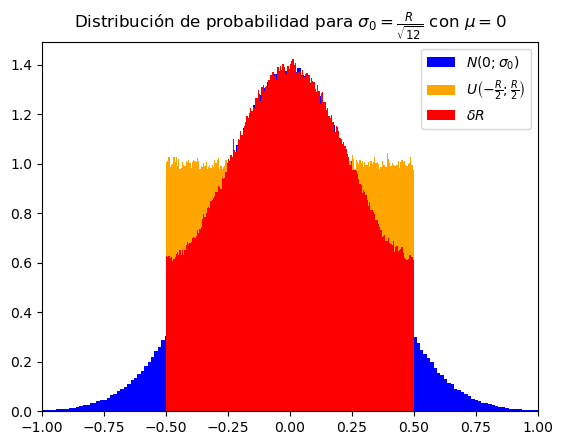

In [8]:
h,x=Histograma(mu,dR,sigma0,R)

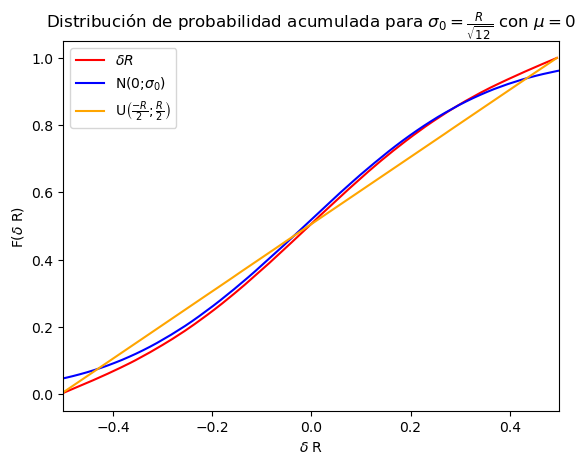

In [9]:
Acumulada(h,x,sigma0,R)

### Para $\sigma_0<\frac{R}{\sqrt{12}}$

In [10]:
R=1
sigma0=0.1*R/np.sqrt(12)

In [11]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

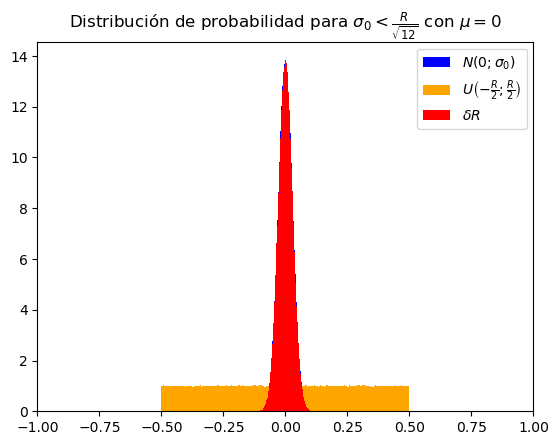

In [12]:
h,x=Histograma(mu,dR,sigma0,R)

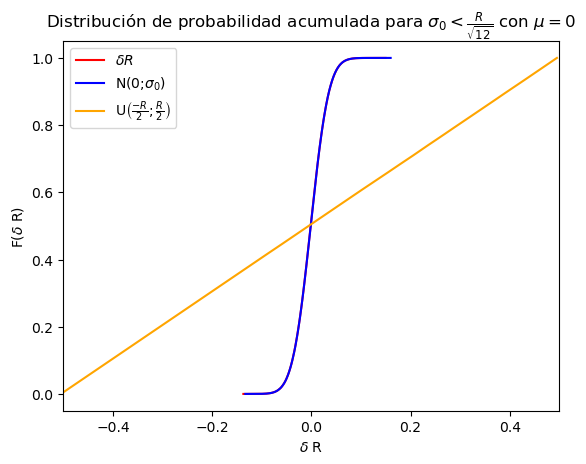

In [13]:
Acumulada(h,x,sigma0,R)

### $\sigma_0>\frac{R}{\sqrt{12}}$

In [14]:
R=1
sigma0=10*R/np.sqrt(12)

In [15]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

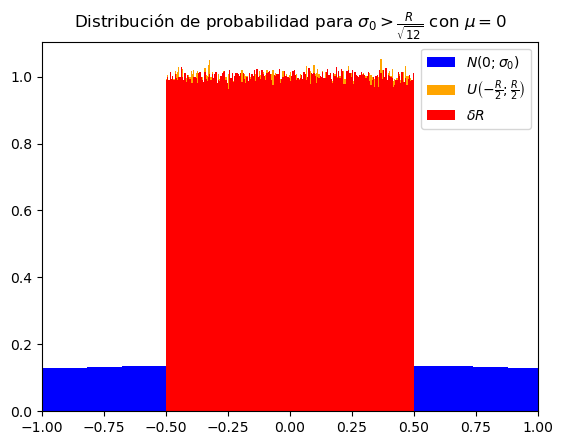

In [16]:
h,x=Histograma(mu,dR,sigma0,R)

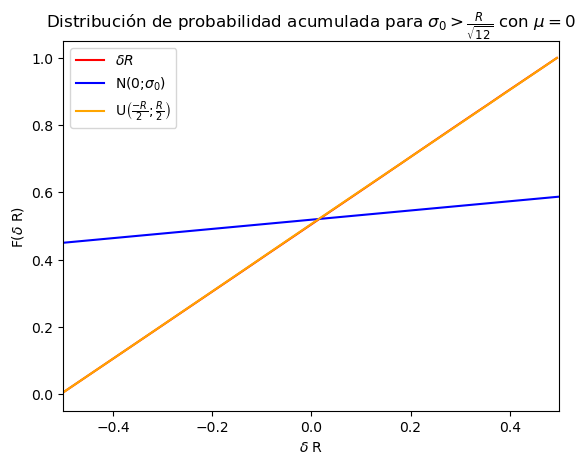

In [17]:
Acumulada(h,x,sigma0,R)

## $\mu=0.5$

In [18]:
mu=0.5

### $\sigma_0=\frac{R}{\sqrt{12}}$

In [19]:
R=1
sigma0=R/np.sqrt(12)

In [20]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

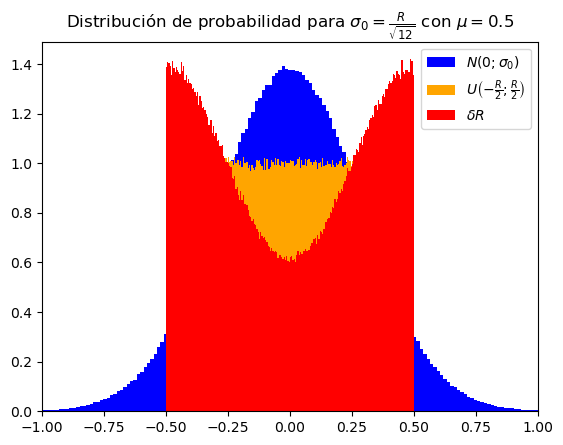

In [21]:
h,x=Histograma(mu,dR,sigma0,R)

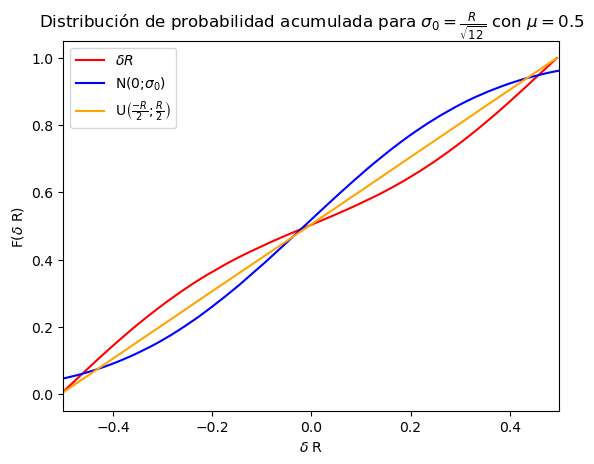

In [22]:
Acumulada(h,x,sigma0,R)

### $\sigma_0<\frac{R}{\sqrt{12}}$

In [23]:
R=1
sigma0=0.1*R/np.sqrt(12)

In [24]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

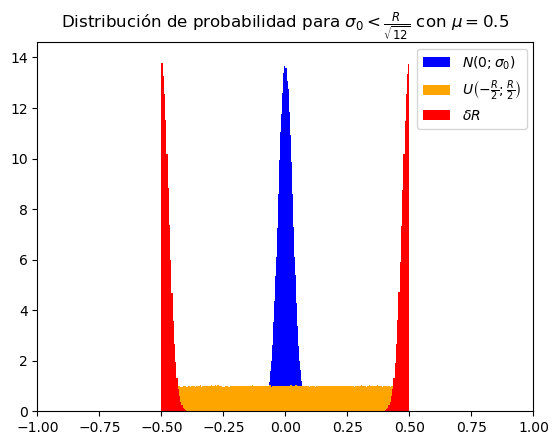

In [25]:
h,x=Histograma(mu,dR,sigma0,R)

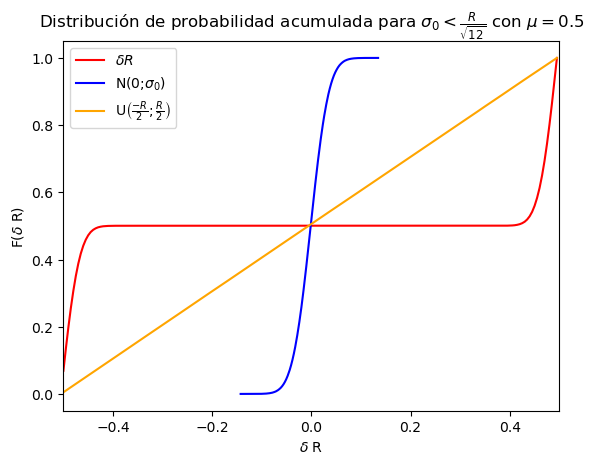

In [26]:
Acumulada(h,x,sigma0,R)

### $\sigma_0>\frac{R}{\sqrt{12}}$

In [27]:
R=1
sigma0=10*R/np.sqrt(12)

In [28]:
dX=normal(0,sigma0,size=N)
dR=np.round_(mu+dX,0)-(mu+dX)

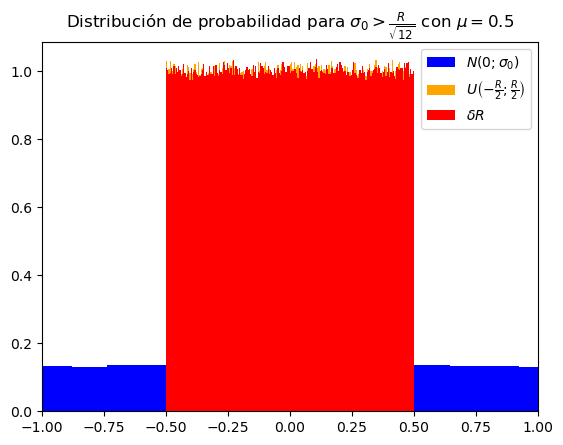

In [29]:
h,x=Histograma(mu,dR,sigma0,R)

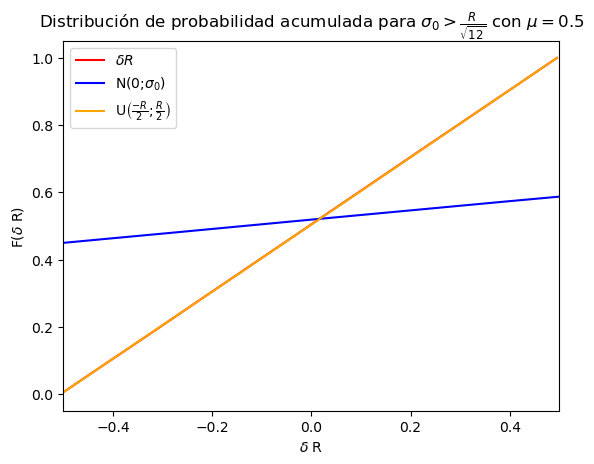

In [30]:
Acumulada(h,x,sigma0,R)

## Análisis con valores fijos de $\mu$